OCR MODEL FOR IMAGES THAT DONT CONTAIN ARABIC LANGUAGE

In [ ]:
from PIL import *
import PIL.Image
Image

<module 'PIL.Image' from '/usr/local/lib/python3.8/dist-packages/PIL/Image.py'>

In [5]:
#Install libraries
!pip install python-doctr[torch]
!pip install  tensorflow-addons
!pip install tf2onnx


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
# Import libraries
from doctr.io import DocumentFile
import matplotlib.pyplot as plt
import cv2
from doctr.models import ocr_predictor
import json
import re
import numpy as np

In [2]:
# defining the model of extraction 
from doctr.models import ocr_predictor

In [41]:
#Cleaning the text extracted from the image
def cleanResult(file_result_img):
  f = open(file_result_img, 'r')
  list_clean_texts_in_image = []
  count = 0
  
  while True:
    count += 1
  
    # Get next line from file
    line = f.readline()
  
    # if line is empty
    # end of file is reached
    if not line:
        break
    if((line.strip()== "" ) or (line.strip()== "-") or (line.strip()== "*")):
      continue
      
    list_clean_texts_in_image.append(line.strip())
  
  f.close()
  return list_clean_texts_in_image



In [42]:
#Defining Our OCR Model
#this method takes in parameters the path to the images
def OCR_model_doctr_Non_arabic(images_path):
  ocr = ocr_predictor(det_arch='db_resnet50' , reco_arch='crnn_vgg16_bn' , pretrained=True)
  images = DocumentFile.from_images(images_path)
  dict_results = {}
  for i in range(len(images)):
    result = ocr([images[i]]) 
    result.show([images[i]])
    text_in_image = result.render()

    #save the result (the text extracted from the image ) in a txt file
    with open("result_image"+str(i+1)+".txt", "w") as f:
        f.write(text_in_image)
    f.close()
    name_of_image = images_path[i].replace("inputs/", "")
    dict_results[name_of_image] = cleanResult("result_image"+str(i+1)+".txt")
  
  #save the output in a json file
  with open("output/output.json", "w", encoding='utf8') as outfile:
      json.dump(dict_results, outfile, ensure_ascii=False)
  outfile.close()


In [43]:
images_path = ["inputs/input_1.png", "inputs/input_3.png"]

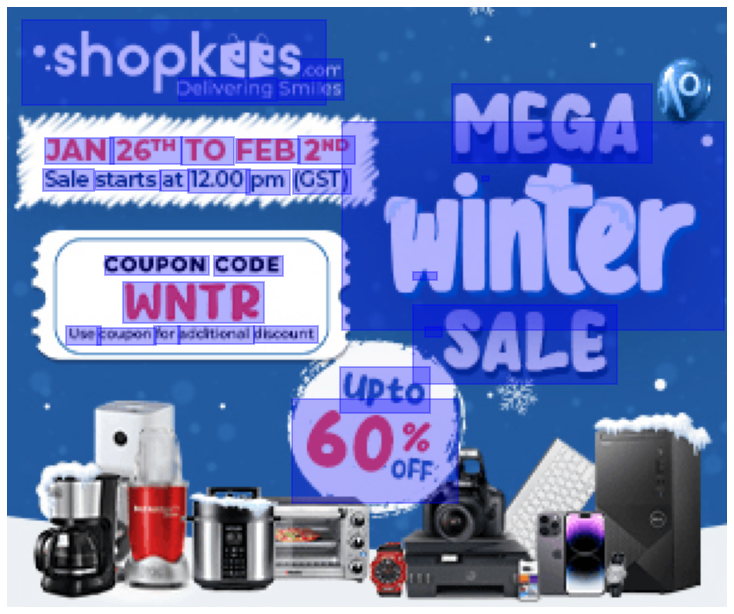

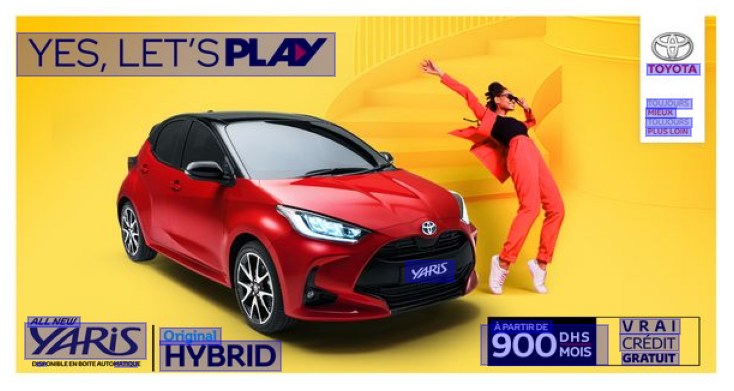

In [44]:
OCR_model_doctr_Non_arabic(images_path)

In [12]:
!pip install jiwer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
from jiwer import wer
from jiwer import cer

In [45]:
#evaluating our ocr model using CER and WER
def evaluate_ocr_model_NonArabic(image_name):

  ground_truth = json.load(open("output/output.json", 'r'))
  hypothesis = json.load(open("output/actual_texts.json", 'r'))
  error_cer = cer(ground_truth[image_name], hypothesis[image_name])
  error_wer = wer(ground_truth[image_name], hypothesis[image_name])
  print("cer for image : " + image_name + " is " + str(error_cer))
  print("wer for image : " + image_name + " is " + str(error_wer))

In [46]:
evaluate_ocr_model_NonArabic("input_1.png")

cer for image : input_1.png is 0.040268456375838924
wer for image : input_1.png is 0.1724137931034483


In [48]:
evaluate_ocr_model_NonArabic("input_3.png")

cer for image : input_3.png is 0.10185185185185185
wer for image : input_3.png is 0.6875


OCR MODEL FOR IMAGES THAT CONTAIN ARABIC LANGUAGE

In [ ]:
!pip install easyocr --no-deps
# !pip uninstall pillow 
# !pip install pillow
!pip install python-bidi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
easyocr 1.6.2 requires ninja, which is not installed.
easyocr 1.6.2 requires opencv-python-headless<=4.5.4.60, but you have opencv-python-headless 4.7.0.68 which is incompatible.


In [ ]:
# import library
import easyocr

In [ ]:
from PIL import *
import PIL.Image
Image

<module 'PIL.Image' from '/usr/local/lib/python3.8/dist-packages/PIL/Image.py'>

In [ ]:
#Defining our ocr model 
#this method takes the path to the images as a parameter
#this method is gonna save the text extracted from each image in a json file "output_arabic.json"
def OCR_model_arabic(images_path):
  reader = easyocr.Reader(['en', 'ar'])
  dict_results = {}
  for i in range(len(images_path)):
    bounds = reader.readtext(images_path[i], detail=0) #detail=0 argument will only give text in array
    name_of_image = images_path[i].replace("inputs/", "")
    dict_results[name_of_image] = bounds
    with open("output/output_arabic.json", "w", encoding='utf8') as outfile:
      json.dump(dict_results, outfile, ensure_ascii=False)
    outfile.close()

In [ ]:
#Applying the model on our images that contains arabic texts
images_path = ['inputs/input_2.png', 'inputs/input_4.png', 'inputs/input_5.png']
OCR_model_arabic(images_path)

In [ ]:
#evaluating our ocr model using CER and WER
def evaluate_ocr_model_Arabic(image_name):

  ground_truth = json.load(open("output/output_arabic.json", 'r'))
  hypothesis = json.load(open("output/actual_texts_arabic.json", 'r'))
  error_cer = cer(ground_truth[image_name], hypothesis[image_name])
  error_wer = wer(ground_truth[image_name], hypothesis[image_name])
  print("cer for image : " + image_name + " is " + str(error_cer))
  print("wer for image : " + image_name + " is " + str(error_wer))

In [ ]:
evaluate_ocr_model_Arabic("input_2.png")

cer for image : input_2.png is 0.18090452261306533
wer for image : input_2.png is 0.46875
